In [61]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
dataset_path = '/content/Courses.csv'
df = pd.read_csv(dataset_path)


In [62]:

# Explore the dataset
df.head()


,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.5,2013-02-14T07:03:41Z,Subject: Web Development
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.5,2013-06-09T15:51:55Z,Subject: Web Development
2,625204.0,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.0,2015-11-02T21:13:27Z,Subject: Web Development
3,173548.0,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.0,2014-04-08T16:21:30Z,Subject: Web Development
4,764164.0,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.5,2016-03-08T22:28:36Z,Subject: Web Development


In [63]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3680 entries, 0 to 3679
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3676 non-null   float64
 1   course_title         3676 non-null   object 
 2   url                  3676 non-null   object 
 3   price                3676 non-null   float64
 4   num_subscribers      3676 non-null   float64
 5   num_reviews          3676 non-null   float64
 6   num_lectures         3676 non-null   float64
 7   level                3676 non-null   object 
 8   Rating               3676 non-null   float64
 9   content_duration     3676 non-null   float64
 10  published_timestamp  3676 non-null   object 
 11  subject              3677 non-null   object 
dtypes: float64(7), object(5)
memory usage: 345.1+ KB
None


# Data Cleaning and Preprocessing


In [64]:

# Handling missing values
df.dropna(inplace=True)

# Convert 'published_timestamp' to datetime
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])

# Feature Engineering
# Extracting year and month from 'published_timestamp'
df['published_year'] = df['published_timestamp'].dt.year
df['published_month'] = df['published_timestamp'].dt.month



In [65]:
df.head(2)

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject,published_year,published_month
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.5,2013-02-14 07:03:41+00:00,Subject: Web Development,2013,2
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.5,2013-06-09 15:51:55+00:00,Subject: Web Development,2013,6


In [66]:
# Count of courses based on below 5 hours
df.content_duration.value_counts()[:5]

1.0    607
1.5    506
2.0    420
2.5    270
3.0    248
3.5    182
4.0    144
4.5    113
5.0    108
Name: content_duration, dtype: int64

# Exploratory Data Analysis (EDA)


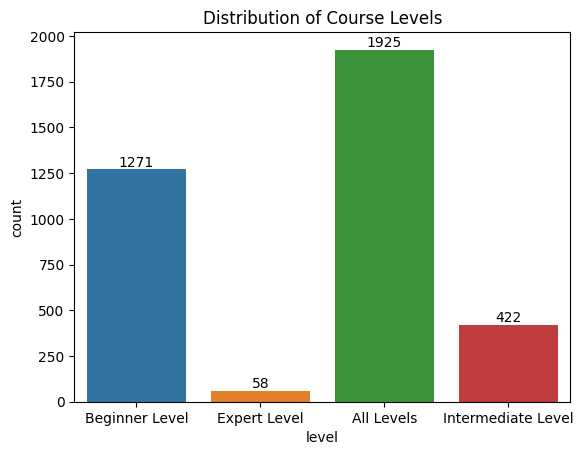

In [67]:
# Visualizing the distribution of course levels
ax =sns.countplot(x='level', data=df )
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribution of Course Levels')
plt.show()





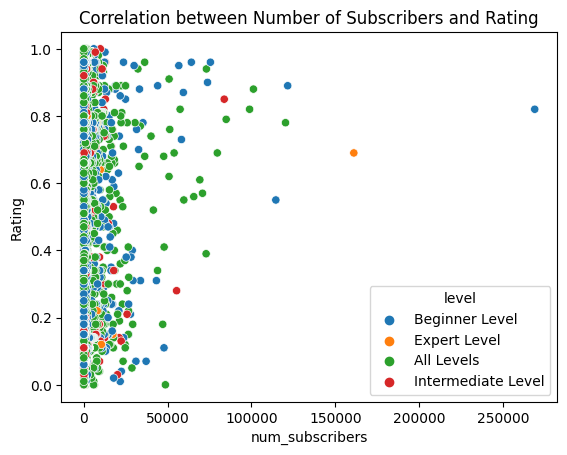

In [80]:
# Correlation between number of subscribers and rating
ax= sns.scatterplot(x='num_subscribers', y='Rating', data=df, hue = 'level')

plt.title('Correlation between Number of Subscribers and Rating')
plt.show()

In [82]:
df.columns
df.subject.value_counts()

Subject: Web Development    1203
Business Finance            1191
Musical Instruments          680
Graphic Design               602
Name: subject, dtype: int64

In [83]:
df.subject.replace({"Subject: Web Development": "Web Development"}, inplace =True)

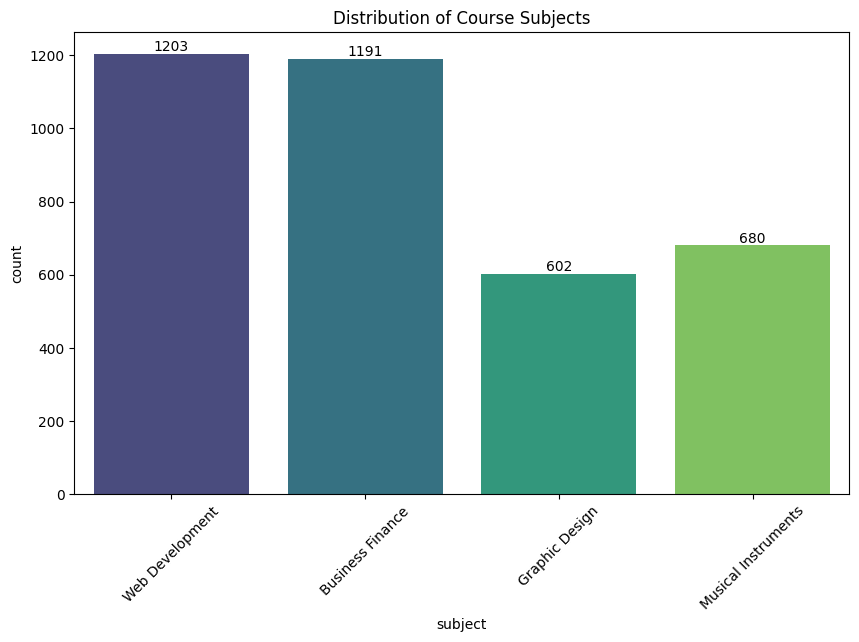

In [85]:

# Visualizing the distribution of course subjects
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='subject', data=df, palette='viridis')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribution of Course Subjects')
plt.xticks(rotation=45)
plt.show()



# Observation

It seems like the dataset contains a variety of subjects, with some being more popular than others.

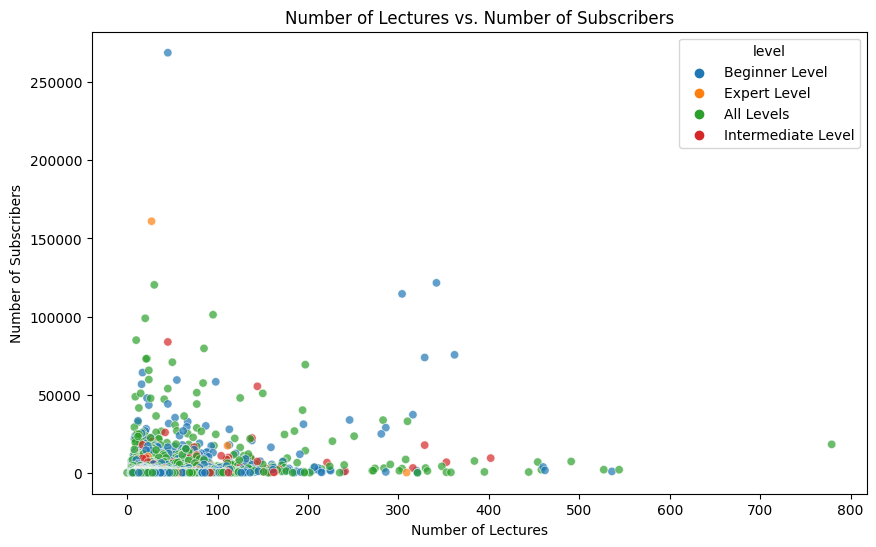

In [86]:

# Explore the relationship between the number of lectures and the number of subscribers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_lectures', y='num_subscribers', data=df, hue='level', alpha=0.7)
plt.title('Number of Lectures vs. Number of Subscribers')
plt.xlabel('Number of Lectures')
plt.ylabel('Number of Subscribers')
plt.show()


# Observation
Courses with more lectures tend to have more subscribers.

Additionally, the color difference indicates that the relationship might vary for different course levels.

In [72]:
xx = df.price.astype(int)
xx.value_counts()

20     828
50     468
0      311
200    295
40     216
30     166
25     153
95     153
100    133
195    128
35     116
150     88
45      83
75      80
60      75
120     37
55      35
85      31
125     30
65      30
80      29
145     27
70      26
90      19
180     17
115     16
175     13
105     11
140     10
190     10
135      8
110      8
165      6
185      6
170      5
160      4
130      3
155      2
Name: price, dtype: int64

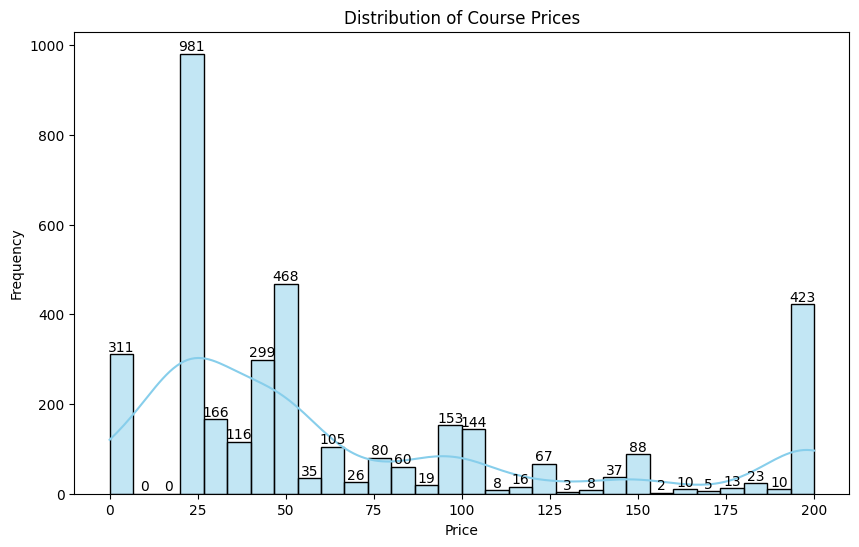

In [73]:

# Analyze the distribution of course prices
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['price'], bins=30, kde=True, color='skyblue', stat="count")
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribution of Course Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


# Observation
Most courses have prices concentrated in a particular range, with only a few being relatively more expensive. This gives an idea of the overall pricing structure in the dataset.

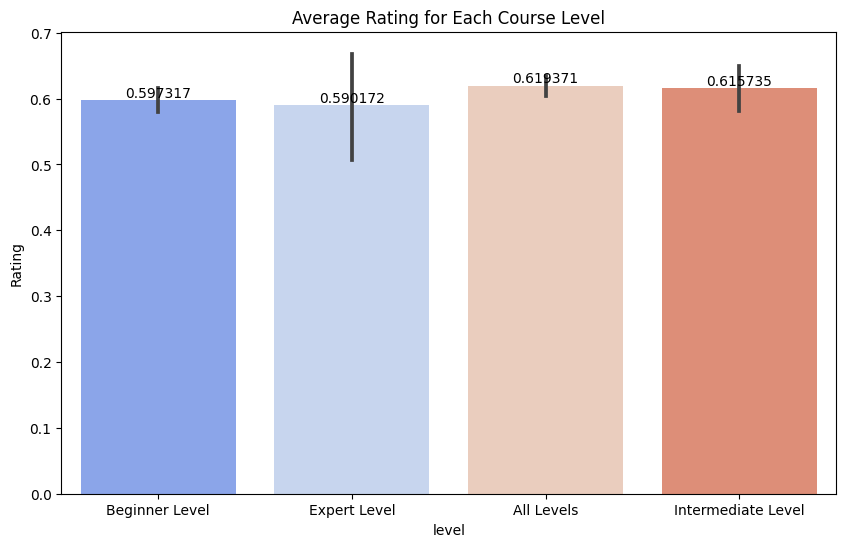

In [74]:

# Analyze the average rating for each course level
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='level', y='Rating', data=df, palette='coolwarm')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Average Rating for Each Course Level')
plt.show()


# Observation
It seems that, on average, courses at certain levels tend to have higher ratings. This could be valuable information for both learners and course creators

<ipython-input-75-6a7f9d63ddd8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


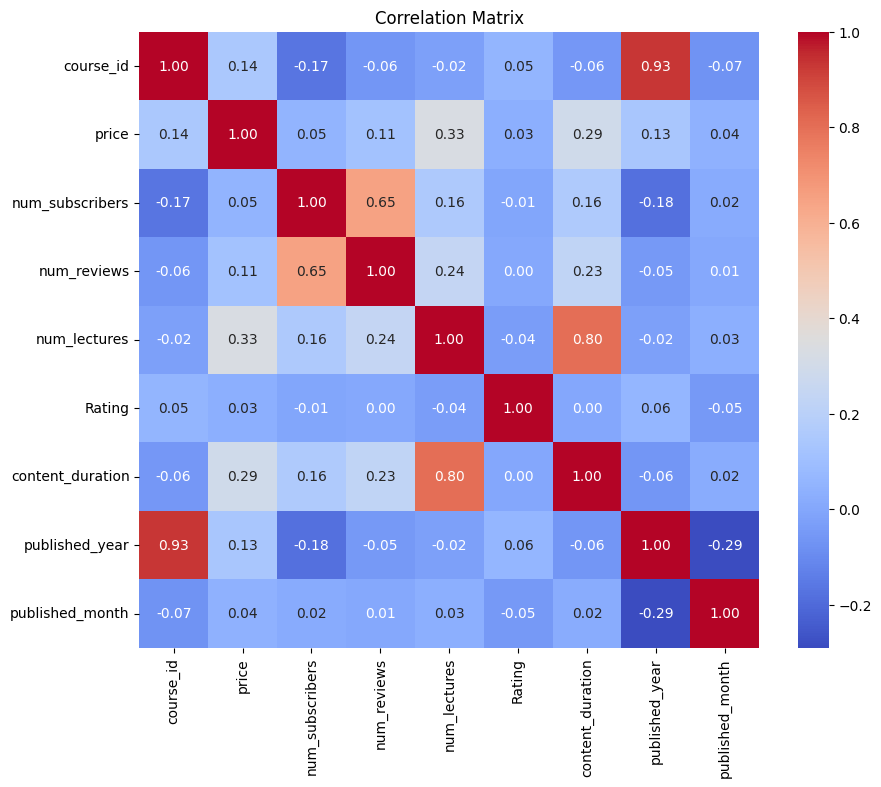

In [75]:

# Analyze the correlation matrix to identify relationships between numerical features
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [76]:
# Identify highly correlated features
highly_correlated_pairs = (correlation_matrix.abs() > 0.7) & (correlation_matrix < 1)
highly_correlated_pairs = highly_correlated_pairs.unstack().reset_index()
highly_correlated_pairs = highly_correlated_pairs[highly_correlated_pairs[0]]
print("\nHighly Correlated Feature Pairs:")
print(highly_correlated_pairs)


Highly Correlated Feature Pairs:
             level_0           level_1     0
7          course_id    published_year  True
42      num_lectures  content_duration  True
58  content_duration      num_lectures  True
63    published_year         course_id  True


# Observation

1. Positive Correlation between Number of Subscribers and Number of Reviews

This suggests that courses with more subscribers tend to attract a higher number of reviews. It aligns with the intuition that popular courses often receive more feedback from learners.

2. No Strong Correlation between Number of Lectures and Rating:

The correlation matrix does not indicate a strong correlation between the number of lectures in a course and its rating. This implies that the length of a course, as measured by the number of lectures, may not be a decisive factor in determining the course rating. Learners may value other aspects of the course content or delivery more than its duration.

# Model Building


In [77]:
# Features and target variable
X = df[['num_subscribers', 'num_reviews', 'num_lectures', 'content_duration', 'published_year', 'published_month']]
y = df['Rating']


In [78]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
from sklearn.metrics import mean_squared_error, r2_score
models = [LinearRegression(), RandomForestRegressor(), DecisionTreeRegressor(), GradientBoostingRegressor()]

best_r2_score = -1
best_model = None
lowest_mse = float('inf')

for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)

    print(f"Model: {model.__class__.__name__}")
    print(f"R2 Score: {r2}")
    print(f"MSE: {mse}")
    print("")

    if r2 > best_r2_score:
        best_r2_score = r2
        best_model = model

    if mse < lowest_mse:
        lowest_mse = mse

print('')
print(f"Best R2 Score: {best_r2_score} by the Model: {model.__class__.__name__}")
print(f"Lowest MSE: {lowest_mse} by the Model: {model.__class__.__name__}")

Model: LinearRegression
R2 Score: -0.002958041122817834
MSE: 0.11042288380000284

Model: RandomForestRegressor
R2 Score: 0.08087531271297044
MSE: 0.10119306529352738

Model: DecisionTreeRegressor
R2 Score: -0.6235565471655271
MSE: 0.1787490489130435

Model: GradientBoostingRegressor
R2 Score: 0.09235897802428927
MSE: 0.09992874576242287


Best R2 Score: 0.09235897802428927 by the Model: GradientBoostingRegressor
Lowest MSE: 0.09992874576242287 by the Model: GradientBoostingRegressor


# Observation
GradientBoostingRegressor performs better than other tested algorithms and futher need to perform Hyperparametric tuning for improvising the models performance to next level